# Optimizers in deep learning

Gradient descent and its many variations are the de facto algorithms to optimize modern deep learning models. Deep learning libraries offers a multitude of these optimization algorithms and often remain enigmatic to most users and are treated as black boxes due to a lack of accessible explanations.

Read the [full article for this notebook at mdrk.io](https://mdrk.io/optimizers-in-deep-learning/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
# Define the Beale function
def beale(x, y):
    return (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2

# Define the gradient of the Beale function
def beale_gradient(x, y):
    df_dx = 2 * (1.5 - x + x * y) * (-1 + y) + 2 * (2.25 - x + x * y**2) * (-1 + y**2) + 2 * (2.625 - x + x * y**3) * (-1 + y**3)
    df_dy = 2 * (1.5 - x + x * y) * x + 4 * (2.25 - x + x * y**2) * x * y + 6 * (2.625 - x + x * y**3) * x * y**2
    return np.array([df_dx, df_dy])

Learning Rate: 1.0
Converged after 3210 iterations
Optimized Parameters: [2.99999705 0.49999926]
Learning Rate: 0.1
Converged after 8239 iterations
Optimized Parameters: [2.99999702 0.49999925]
Learning Rate: 0.01
Converged after 15116 iterations
Optimized Parameters: [2.999997   0.49999925]
Learning Rate: 0.001
Converged after 23679 iterations
Optimized Parameters: [2.99999686 0.49999921]
Learning Rate: 1.0
Converged after 318 iterations
Optimized Parameters: [3.0000003  0.50000015]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [-17.0298162    1.05537517]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [-39.0557053    1.02481677]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [-15.28188995   1.06137717]
Learning Rate: 1.0
Converged after 654 iterations
Optimized Parameters: [2.99999712 0.49999927]
Learning Rate: 0.1
Converged after 2871 iterations
Optimized Parameters: [2.99999715 0.49999928]
Learning 

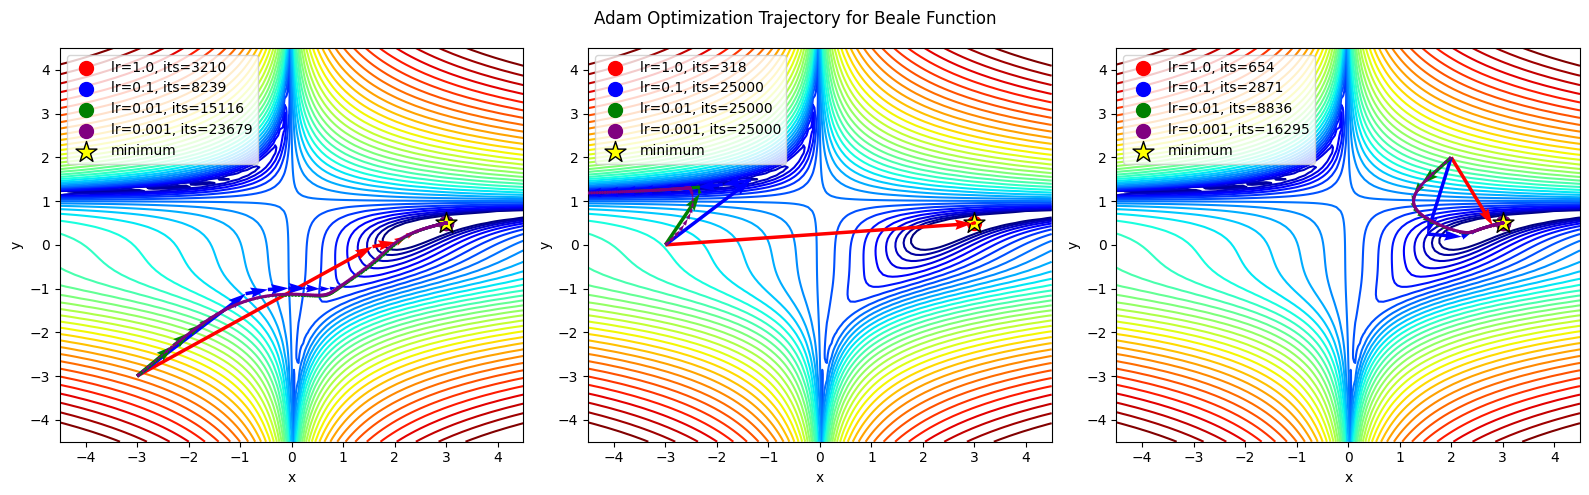

In [3]:
# Adam optimizer implementation
def adam_optimizer(func, grad_func, initial_params, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=25000, tol=1e-6):
    params = initial_params
    m = np.zeros_like(params)
    v = np.zeros_like(params)
    t = 0
    
    # Store parameters every 100 steps
    params_history = [params.copy()]
    
    while t < max_iter:
        t += 1
        gradient = grad_func(*params)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        params -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        
        if t % 100 == 0:
            params_history.append(params.copy())
        
        if np.linalg.norm(gradient) < tol:
            break
    
    if t % 100 != 0:
        params_history.append(params.copy())
        
    print("Converged after", t, "iterations")
    return params, params_history, t


# Optimizer name
optimizer_name = 'Adam'

# Visualize convergence trajectory
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)
X, Y = np.meshgrid(x, y)
Z = beale(X, Y)

beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Plot three panels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
initial_params_arrays = [np.array([-3.0, -3.0]),np.array([-3.0, 0.0]),np.array([2.0, 2.0])]
for it,ax in enumerate(axs):
    contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    colors = ['red','blue', 'green', 'purple']
    for c, learning_rate in enumerate([1.0, 0.1, 0.01, 0.001]):
        print("Learning Rate:", learning_rate)
        
        # Initial parameters and hyperparameters
        initial_params = initial_params_arrays[it].copy()

        # Execute Optimizer
        optimized_params, params_history, its = adam_optimizer(beale, beale_gradient, initial_params, learning_rate, beta1, beta2, epsilon)

        # Print optimized parameters
        print("Optimized Parameters:", optimized_params)
        ax.scatter(optimized_params[0], optimized_params[1], color=colors[c], s=100, zorder=2, label='lr='+str(learning_rate) + ', its='+str(its))

        # Draw vectors from the previous position to the current position
        for i in range(1, len(params_history)):
            ax.quiver(*params_history[i-1], *(params_history[i]-params_history[i-1]), angles='xy', scale_units='xy', scale=1, color=colors[c], zorder=3)

    # Draw a yellow star with a black border at [3.0, 0.5]
    ax.scatter(3.0, 0.5, marker='*', color='yellow', edgecolor='black', s=250, zorder=2, label='minimum')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.legend(loc='upper left')


# Title across all panels
fig.suptitle(f'{optimizer_name} Optimization Trajectory for Beale Function')
# Tight layout
plt.tight_layout()
# Save figure with 300 dpi
# plt.savefig(f'adam_optimization_trajectory.png', dpi=300)
plt.show()


Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [nan nan]
Learning Rate: 0.0001


/var/folders/n5/4bs4wjzd7c78c0mh4f378v8h0000gn/T/ipykernel_41183/3071163870.py:7: RuntimeWarning: overflow encountered in scalar multiply
  df_dx = 2 * (1.5 - x + x * y) * (-1 + y) + 2 * (2.25 - x + x * y**2) * (-1 + y**2) + 2 * (2.625 - x + x * y**3) * (-1 + y**3)
/var/folders/n5/4bs4wjzd7c78c0mh4f378v8h0000gn/T/ipykernel_41183/3071163870.py:7: RuntimeWarning: overflow encountered in scalar power
  df_dx = 2 * (1.5 - x + x * y) * (-1 + y) + 2 * (2.25 - x + x * y**2) * (-1 + y**2) + 2 * (2.625 - x + x * y**3) * (-1 + y**3)
/var/folders/n5/4bs4wjzd7c78c0mh4f378v8h0000gn/T/ipykernel_41183/3071163870.py:8: RuntimeWarning: overflow encountered in scalar multiply
  df_dy = 2 * (1.5 - x + x * y) * x + 4 * (2.25 - x + x * y**2) * x * y + 6 * (2.625 - x + x * y**3) * x * y**2
/var/folders/n5/4bs4wjzd7c78c0mh4f378v8h0000gn/T/ipykernel_41183/3071163870.py:8: RuntimeWarning: overflow encountered in scalar power
  df_dy = 2 * (1.5 - x + x * y) * x + 4 * (2.25 - x + x * y**2) * x * y + 6 * (2.625 -

Converged after 25000 iterations
Optimized Parameters: [nan nan]
Learning Rate: 1e-05
Converged after 25000 iterations
Optimized Parameters: [-2.25431805  1.32861667]
Learning Rate: 1e-06
Converged after 25000 iterations
Optimized Parameters: [ 1.18621849 -0.18357217]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [-10.02814337   1.09107667]
Learning Rate: 0.0001
Converged after 25000 iterations
Optimized Parameters: [-4.65103217  1.18121335]
Learning Rate: 1e-05
Converged after 25000 iterations
Optimized Parameters: [-2.92645382  1.26704006]
Learning Rate: 1e-06
Converged after 25000 iterations
Optimized Parameters: [-2.64322889  1.28983624]
Learning Rate: 0.001
Converged after 3624 iterations
Optimized Parameters: [2.9999968 0.4999992]
Learning Rate: 0.0001
Converged after 25000 iterations
Optimized Parameters: [2.99980963 0.49995248]
Learning Rate: 1e-05
Converged after 25000 iterations
Optimized Parameters: [2.78918459 0.44225983]
Learning Rate: 1e-06
C

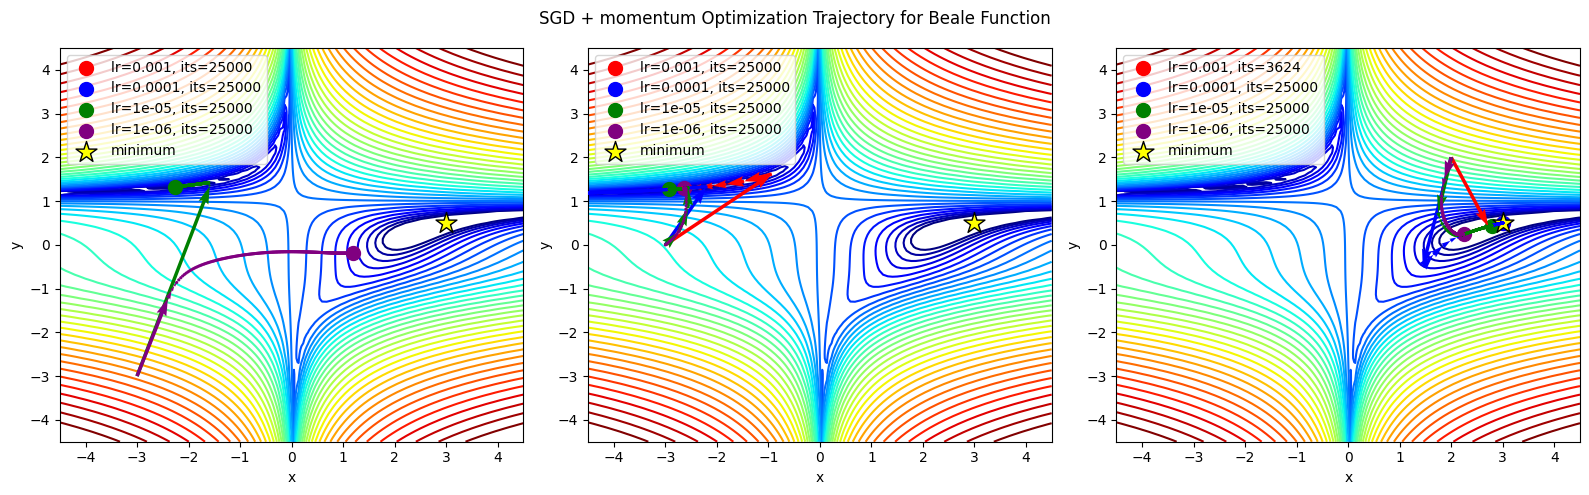

In [4]:
# SGD with momentum optimizer implementation
def sgd_with_momentum_optimizer(func, grad_func, initial_params, learning_rate=0.01, momentum=0.9, max_iter=25000, tol=1e-6):
    params = initial_params
    velocity = np.zeros_like(params)
    t = 0
    
    # Store parameters every 100 steps
    params_history = [params.copy()]
    
    while t < max_iter:
        t += 1
        gradient = grad_func(*params)
        velocity = momentum * velocity - learning_rate * gradient
        params += velocity
        
        if t % 100 == 0:
            params_history.append(params.copy())
        
        if np.linalg.norm(gradient) < tol:
            break
    
    if t % 100 != 0:
        params_history.append(params.copy())
        
    print("Converged after", t, "iterations")
    return params, params_history, t



# Optimizer name
optimizer_name = 'SGD + momentum'

# Plot three panels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
initial_params_arrays = [np.array([-3.0, -3.0]),np.array([-3.0, 0.0]),np.array([2.0, 2.0])]
for it,ax in enumerate(axs):
    contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    colors = ['red','blue', 'green', 'purple']
    for c, learning_rate in enumerate([1e-3, 1e-4, 1e-5, 1e-6]):
        print("Learning Rate:", learning_rate)
        
        # Initial parameters and hyperparameters
        initial_params = initial_params_arrays[it].copy()

        # Execute Optimizer
        optimized_params, params_history, its = sgd_with_momentum_optimizer(beale, beale_gradient, initial_params, learning_rate)

        # Print optimized parameters
        print("Optimized Parameters:", optimized_params)
        ax.scatter(optimized_params[0], optimized_params[1], color=colors[c], s=100, zorder=2, label='lr='+str(learning_rate) + ', its='+str(its))

        # Draw vectors from the previous position to the current position
        for i in range(1, len(params_history)):
            ax.quiver(*params_history[i-1], *(params_history[i]-params_history[i-1]), angles='xy', scale_units='xy', scale=1, color=colors[c], zorder=3)

    # Draw a yellow star with a black border at [3.0, 0.5]
    ax.scatter(3.0, 0.5, marker='*', color='yellow', edgecolor='black', s=250, zorder=2, label='minimum')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.legend(loc='upper left')


fig.suptitle(f'{optimizer_name} Optimization Trajectory for Beale Function')
# Tight layout
plt.tight_layout()
# Save figure with 300 dpi
# plt.savefig(f'momentum_optimization_trajectory.png', dpi=300)
plt.show()


Learning Rate: 1.0
Converged after 25000 iterations
Optimized Parameters: [2.7290407  0.45655965]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.9605438  0.48989683]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [2.99356085 0.49838331]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [2.96325597 0.49071179]
Learning Rate: 1.0
Converged after 25000 iterations
Optimized Parameters: [2.66596253 0.4246028 ]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [-5.12282919  1.16631946]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [-8.91527531  1.10146587]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [-7.43158691  1.11978131]
Learning Rate: 1.0
Converged after 25000 iterations
Optimized Parameters: [2.75937073 0.4017308 ]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.95864178 0.48897325]
Learning

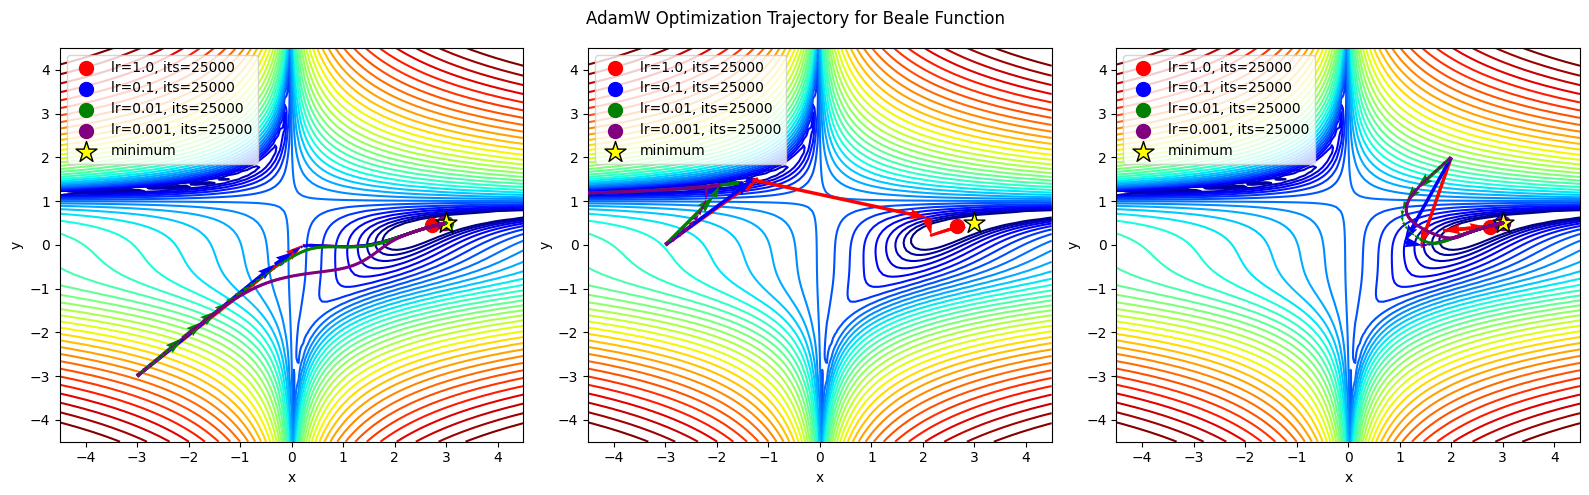

In [5]:
# AdamW optimizer implementation
def adamw_optimizer(func, grad_func, initial_params, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay=0.01, max_iter=25000, tol=1e-6):
    params = initial_params
    m = np.zeros_like(params)
    v = np.zeros_like(params)
    t = 0
    
    # Store parameters every 100 steps
    params_history = [params.copy()]
    
    while t < max_iter:
        t += 1
        gradient = grad_func(*params)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        params -= learning_rate * (m_hat / (np.sqrt(v_hat) + epsilon) + weight_decay * params)
        
        if t % 100 == 0:
            params_history.append(params.copy())
        
        if np.linalg.norm(gradient) < tol:
            break
    
    if t % 100 != 0:
        params_history.append(params.copy())
        
    print("Converged after", t, "iterations")
    return params, params_history, t

# Optimizer name
optimizer_name = 'AdamW'

# Plot three panels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
initial_params_arrays = [np.array([-3.0, -3.0]),np.array([-3.0, 0.0]),np.array([2.0, 2.0])]
for it,ax in enumerate(axs):
    contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    colors = ['red','blue', 'green', 'purple']
    for c, learning_rate in enumerate([1.0, 0.1, 0.01, 0.001]):
        print("Learning Rate:", learning_rate)
        
        # Initial parameters and hyperparameters
        initial_params = initial_params_arrays[it].copy()
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8
        weight_decay = 0.1

        # Execute Optimizer
        optimized_params, params_history, its = adamw_optimizer(beale, beale_gradient, initial_params, learning_rate, beta1, beta2, epsilon, weight_decay)

        # Print optimized parameters
        print("Optimized Parameters:", optimized_params)
        ax.scatter(optimized_params[0], optimized_params[1], color=colors[c], s=100, zorder=2, label='lr='+str(learning_rate) + ', its='+str(its))

        # Draw vectors from the previous position to the current position
        for i in range(1, len(params_history)):
            ax.quiver(*params_history[i-1], *(params_history[i]-params_history[i-1]), angles='xy', scale_units='xy', scale=1, color=colors[c], zorder=3)

    # Draw a yellow star with a black border at [3.0, 0.5]
    ax.scatter(3.0, 0.5, marker='*', color='yellow', edgecolor='black', s=250, zorder=2, label='minimum')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.legend(loc='upper left')


fig.suptitle(f'{optimizer_name} Optimization Trajectory for Beale Function')
# Tight layout
plt.tight_layout()
# Save figure with 300 dpi
# plt.savefig(f'adamw_optimization_trajectory.png', dpi=300)
plt.show()


Learning Rate: 1.0
Converged after 20000 iterations
Optimized Parameters: [2.75086865 0.42900652]
Learning Rate: 0.1
Converged after 20000 iterations
Optimized Parameters: [ 0.71505834 -1.13228546]
Learning Rate: 0.01
Converged after 20000 iterations
Optimized Parameters: [-1.6547108  -1.73392556]
Learning Rate: 0.001
Converged after 20000 iterations
Optimized Parameters: [-2.74562865 -2.74641628]
Learning Rate: 1.0
Converged after 20000 iterations
Optimized Parameters: [-8.01113067  1.11566597]
Learning Rate: 0.1
Converged after 20000 iterations
Optimized Parameters: [-4.68959516  1.179934  ]
Learning Rate: 0.01
Converged after 20000 iterations
Optimized Parameters: [-2.54871116  1.2985081 ]
Learning Rate: 0.001
Converged after 20000 iterations
Optimized Parameters: [-2.73086203  0.30290309]
Learning Rate: 1.0
Converged after 12904 iterations
Optimized Parameters: [2.9999971  0.49999927]
Learning Rate: 0.1
Converged after 20000 iterations
Optimized Parameters: [2.82016692 0.45016536]


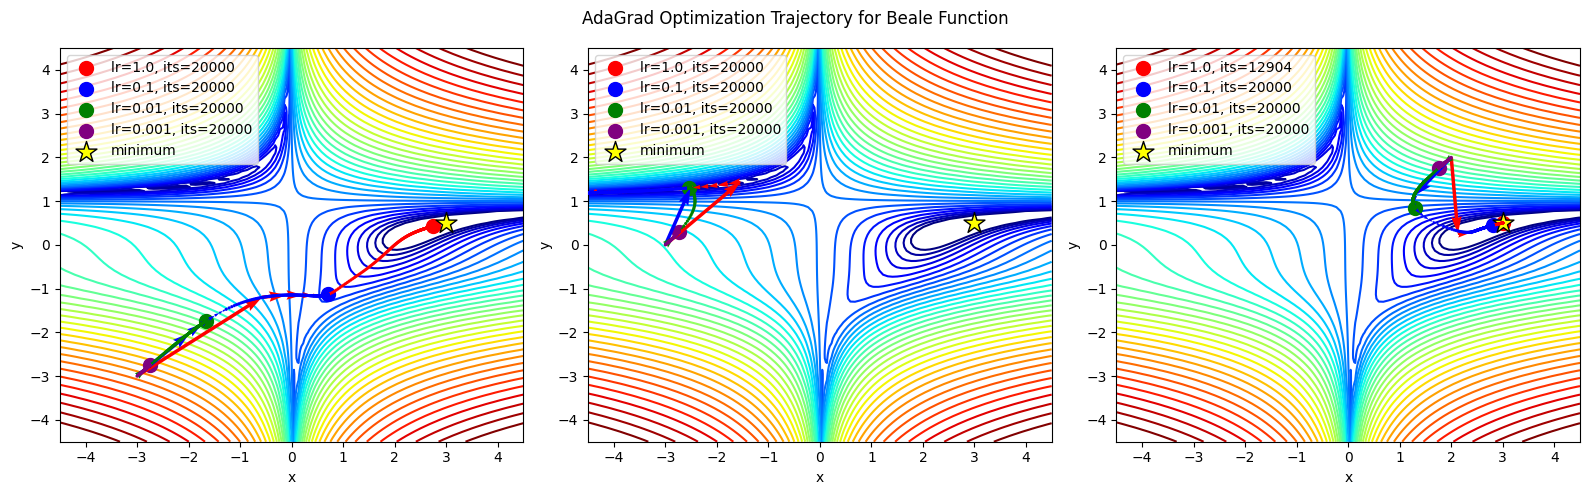

In [6]:
def adagrad_optimizer(func, grad_func, initial_params, learning_rate=0.01, epsilon=1e-8, max_iter=20000, tol=1e-6):
    params = initial_params
    grad_squared_sum = np.zeros_like(params)
    t = 0
    
    # Store parameters every 100 steps
    params_history = [params.copy()]
    
    while t < max_iter:
        t += 1
        gradient = grad_func(*params)
        grad_squared_sum += gradient ** 2
        adjusted_learning_rate = learning_rate / (np.sqrt(grad_squared_sum) + epsilon)
        params -= adjusted_learning_rate * gradient
        
        if t % 100 == 0:
            params_history.append(params.copy())
        
        if np.linalg.norm(gradient) < tol:
            break
    
    if t % 100 != 0:
        params_history.append(params.copy())
        
    print("Converged after", t, "iterations")
    return params, params_history, t



# Optimizer name
optimizer_name = 'AdaGrad'

# Plot three panels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
initial_params_arrays = [np.array([-3.0, -3.0]),np.array([-3.0, 0.0]),np.array([2.0, 2.0])]
for it,ax in enumerate(axs):
    contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    colors = ['red','blue', 'green', 'purple']
    for c, learning_rate in enumerate([1.0, 0.1, 0.01, 0.001]):
        print("Learning Rate:", learning_rate)
        
        # Initial parameters and hyperparameters
        initial_params = initial_params_arrays[it].copy()
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8
        weight_decay = 0.01

        # Execute Optimizer
        optimized_params, params_history, its = adagrad_optimizer(beale, beale_gradient, initial_params, learning_rate)

        # Print optimized parameters
        print("Optimized Parameters:", optimized_params)
        ax.scatter(optimized_params[0], optimized_params[1], color=colors[c], s=100, zorder=2, label='lr='+str(learning_rate) + ', its='+str(its))

        # Draw vectors from the previous position to the current position
        for i in range(1, len(params_history)):
            ax.quiver(*params_history[i-1], *(params_history[i]-params_history[i-1]), angles='xy', scale_units='xy', scale=1, color=colors[c], zorder=3)

    # Draw a yellow star with a black border at [3.0, 0.5]
    ax.scatter(3.0, 0.5, marker='*', color='yellow', edgecolor='black', s=250, zorder=2, label='minimum')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.legend(loc='upper left')


fig.suptitle(f'{optimizer_name} Optimization Trajectory for Beale Function')
# Tight layout
plt.tight_layout()
# Save figure with 300 dpi
# plt.savefig(f'adagrad_optimization_trajectory.png', dpi=300)
plt.show()


Learning Rate: 1.0
Converged after 24058 iterations
Optimized Parameters: [2.99999701 0.49999925]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.76777525 0.43440337]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [ 0.71431638 -1.13441329]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [-1.5804162  -1.67684496]
Learning Rate: 1.0
Converged after 312 iterations
Optimized Parameters: [3.00000237 0.5000006 ]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [-10.36677907   1.08831939]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [-4.45118794  1.18818827]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [-2.56122968  1.297344  ]
Learning Rate: 1.0
Converged after 1582 iterations
Optimized Parameters: [2.99999697 0.49999924]
Learning Rate: 0.1
Converged after 15270 iterations
Optimized Parameters: [2.9999971  0.49999927]
Learn

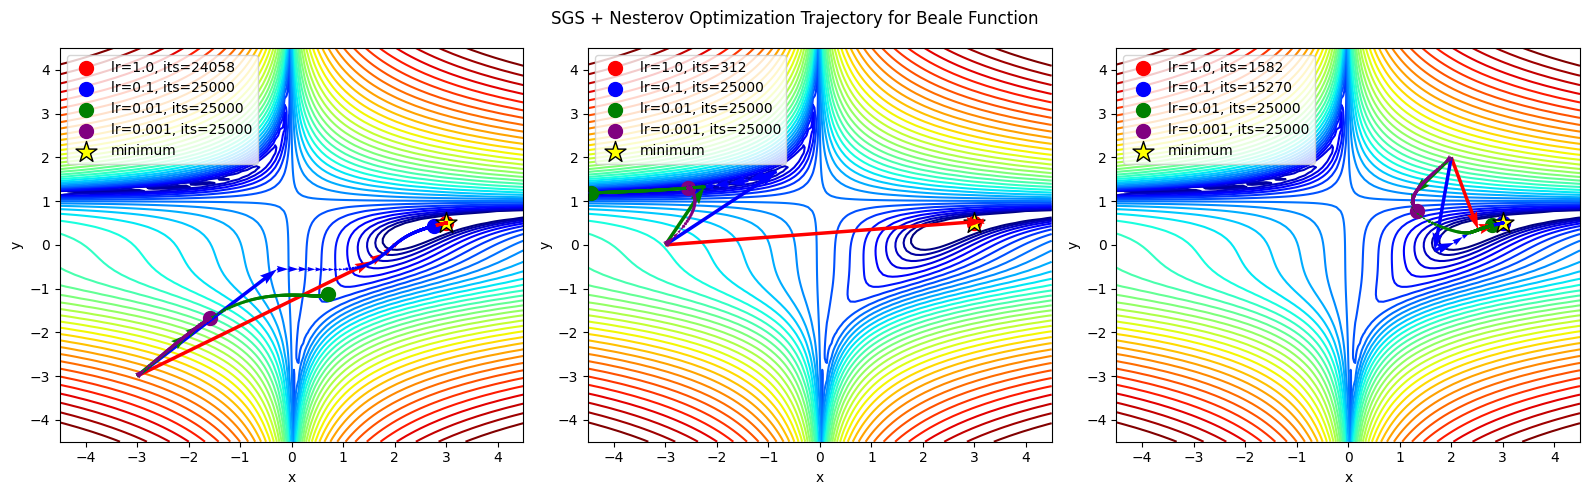

In [7]:
# Nesterov optimizer implementation
def nesterov_optimizer(func, grad_func, initial_params, learning_rate=0.01, momentum=0.9, eps=1e-8, max_iter=25000, tol=1e-6):
    params = initial_params
    velocity = np.zeros_like(params)
    m = np.zeros_like(params) # Historical gradient sum
    t = 0
    
    # Store parameters every 100 steps
    params_history = [params.copy()]
    
    while t < max_iter:
        t += 1
        lookahead_params = params - momentum * velocity
        gradient = grad_func(*lookahead_params)
        m += gradient ** 2
        adjusted_learning_rate = learning_rate / np.sqrt(m + eps)
        velocity = momentum * velocity + adjusted_learning_rate * gradient
        params -= velocity
        
        if t % 100 == 0:
            params_history.append(params.copy())
        
        if np.linalg.norm(gradient) < tol:
            break
    
    print("Converged after", t, "iterations")
    # print(t, 'm', m)
    return params, params_history, t

# Optimizer name
optimizer_name = 'SGS + Nesterov'

# Plot three panels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
initial_params_arrays = [np.array([-3.0, -3.0]),np.array([-3.0, 0.0]),np.array([2.0, 2.0])]
for it,ax in enumerate(axs):
    contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    colors = ['red','blue', 'green', 'purple']
    for c, learning_rate in enumerate([1.0, 0.1, 0.01, 0.001]):
        print("Learning Rate:", learning_rate)
        
        # Initial parameters and hyperparameters
        initial_params = initial_params_arrays[it].copy()

        # Execute Optimizer
        optimized_params, params_history, its = nesterov_optimizer(beale, beale_gradient, initial_params, learning_rate)

        # Print optimized parameters
        print("Optimized Parameters:", optimized_params)
        ax.scatter(optimized_params[0], optimized_params[1], color=colors[c], s=100, zorder=2, label='lr='+str(learning_rate) + ', its='+str(its))

        # Draw vectors from the previous position to the current position
        for i in range(1, len(params_history)):
            ax.quiver(*params_history[i-1], *(params_history[i]-params_history[i-1]), angles='xy', scale_units='xy', scale=1, color=colors[c], zorder=3)

    # Draw a yellow star with a black border at [3.0, 0.5]
    ax.scatter(3.0, 0.5, marker='*', color='yellow', edgecolor='black', s=250, zorder=2, label='minimum')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.legend(loc='upper left')


fig.suptitle(f'{optimizer_name} Optimization Trajectory for Beale Function')
# Tight layout
plt.tight_layout()
# Save figure with 300 dpi
# plt.savefig(f'nesterov_optimization_trajectory.png', dpi=300)
plt.show()


Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.90173527 0.50218902]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [2.99949728 0.49930351]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [3.00035154 0.4996372 ]
Learning Rate: 0.0001
Converged after 7864 iterations
Optimized Parameters: [3.00002275 0.49997713]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.96929624 0.44077545]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [-18.17243501   1.05415621]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [-47.79414424   1.02012493]
Learning Rate: 0.0001
Converged after 25000 iterations
Optimized Parameters: [-25.5795576   1.0374805]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.90173527 0.50218902]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [3.00329362 0.49561177

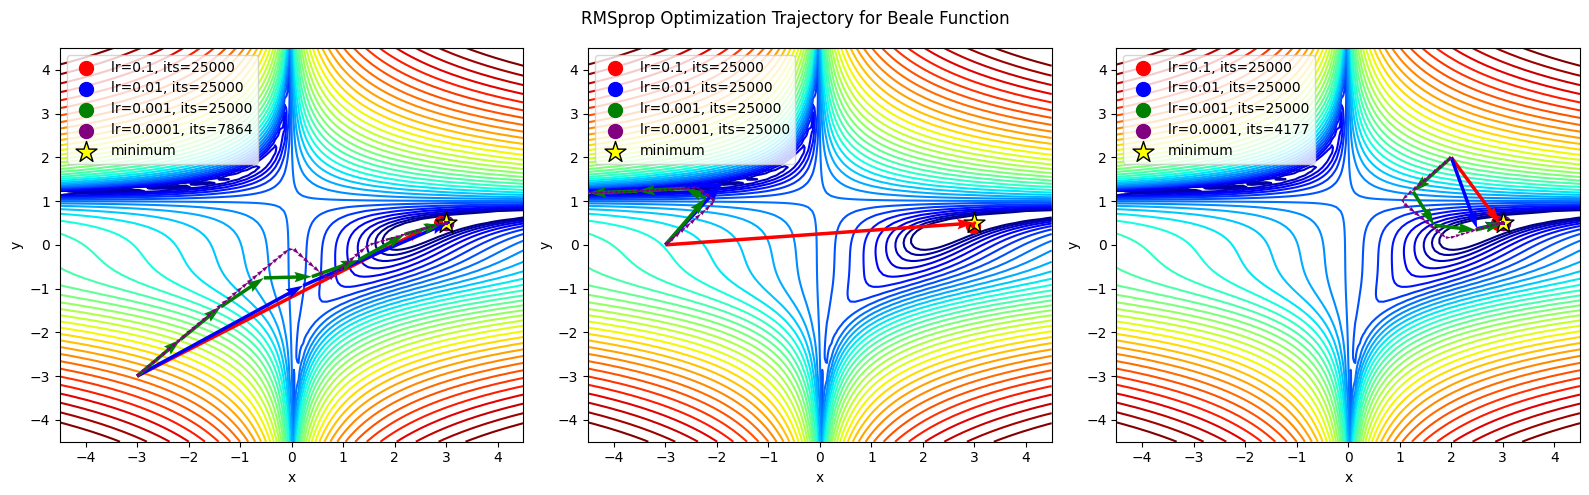

In [8]:
# RMSprop optimizer implementation with momentum
def rmsprop_optimizer(func, grad_func, initial_params, learning_rate=0.01, decay_rate=0.9, momentum=0.9, eps=1e-8, max_iter=25000, tol=1e-6):
    params = initial_params
    velocity = np.zeros_like(params)
    rmsprop_cache = np.zeros_like(params)  # Cache for squared gradients
    t = 0
    
    # Store parameters every 100 steps
    params_history = [params.copy()]
    
    while t < max_iter:
        t += 1
        gradient = grad_func(*params)
        rmsprop_cache = decay_rate * rmsprop_cache + (1 - decay_rate) * gradient ** 2
        adjusted_learning_rate = learning_rate / (np.sqrt(rmsprop_cache) + eps)
        velocity = momentum * velocity - adjusted_learning_rate * gradient
        params += velocity
        
        if t % 100 == 0:
            params_history.append(params.copy())
        
        if np.linalg.norm(gradient) < tol:
            break
    
    print("Converged after", t, "iterations")
    return params, params_history, t


# Optimizer name
optimizer_name = 'RMSprop'

# Plot three panels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
initial_params_arrays = [np.array([-3.0, -3.0]),np.array([-3.0, 0.0]),np.array([2.0, 2.0])]
for it,ax in enumerate(axs):
    contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    colors = ['red','blue', 'green', 'purple']
    for c, learning_rate in enumerate([0.1, 0.01, 0.001, 0.0001]):
        print("Learning Rate:", learning_rate)
        
        # Initial parameters and hyperparameters
        initial_params = initial_params_arrays[it].copy()

        # Execute Optimizer
        optimized_params, params_history, its = rmsprop_optimizer(beale, beale_gradient, initial_params, learning_rate)

        # Print optimized parameters
        print("Optimized Parameters:", optimized_params)
        ax.scatter(optimized_params[0], optimized_params[1], color=colors[c], s=100, zorder=2, label='lr='+str(learning_rate) + ', its='+str(its))

        # Draw vectors from the previous position to the current position
        for i in range(1, len(params_history)):
            ax.quiver(*params_history[i-1], *(params_history[i]-params_history[i-1]), angles='xy', scale_units='xy', scale=1, color=colors[c], zorder=3)

    # Draw a yellow star with a black border at [3.0, 0.5]
    ax.scatter(3.0, 0.5, marker='*', color='yellow', edgecolor='black', s=250, zorder=2, label='minimum')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.legend(loc='upper left')


fig.suptitle(f'{optimizer_name} Optimization Trajectory for Beale Function')
# Tight layout
plt.tight_layout()
# Save figure with 300 dpi
# plt.savefig(f'RMSprop_optimization_trajectory.png', dpi=300)
plt.show()


Learning Rate: 1.0
Converged after 5381 iterations
Optimized Parameters: [2.99999705 0.49999926]
Learning Rate: 0.1
Converged after 7695 iterations
Optimized Parameters: [2.99999706 0.49999926]
Learning Rate: 0.01
Converged after 9997 iterations
Optimized Parameters: [2.99999708 0.49999926]
Learning Rate: 0.001
Converged after 12298 iterations
Optimized Parameters: [2.99999706 0.49999926]
Learning Rate: 1.0
Converged after 25000 iterations
Optimized Parameters: [-13.93910283   1.06695486]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [-43.53086456   1.02231556]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [-44.09452707   1.02203197]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [-22.13502668   1.04307587]
Learning Rate: 1.0
Converged after 2581 iterations
Optimized Parameters: [2.99999714 0.49999928]
Learning Rate: 0.1
Converged after 4799 iterations
Optimized Parameters: [2.99999715 0.49999928]
Lea

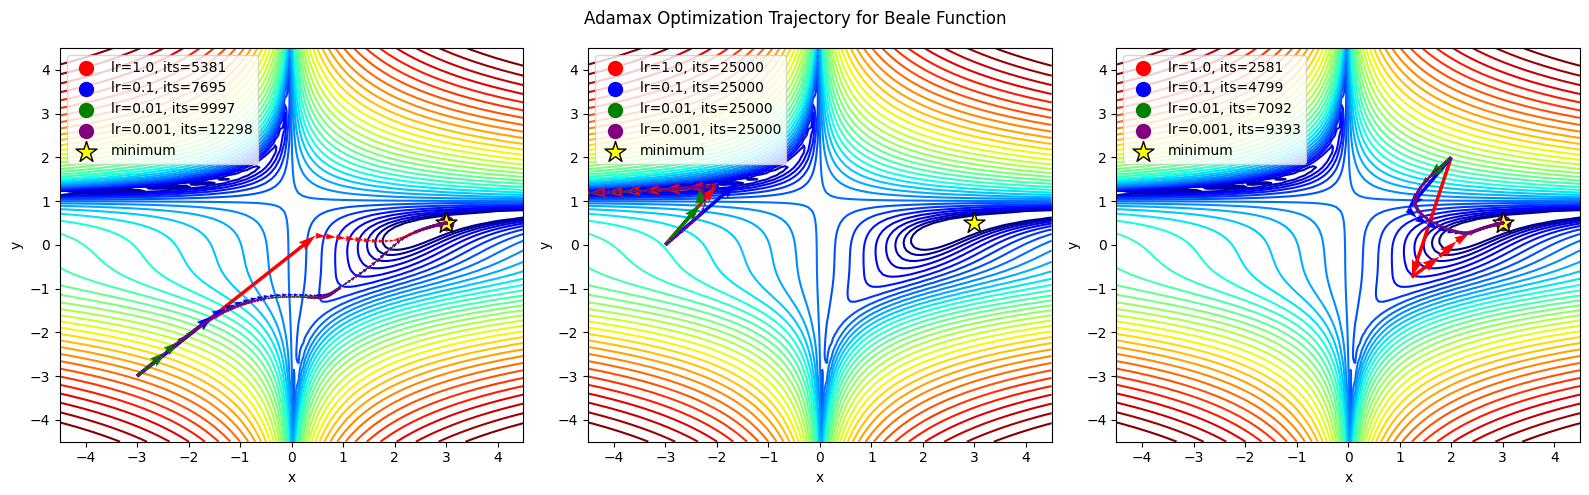

In [9]:
# Adamax optimizer implementation
def adamax_optimizer(func, grad_func, initial_params, learning_rate=0.01, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=25000, tol=1e-6):
    params = initial_params
    m = np.zeros_like(params)  # Exponential moving average of gradient
    u = np.zeros_like(params)  # Exponential moving average of squared gradient with infinite norm
    t = 0
    
    # Store parameters every 100 steps
    params_history = [params.copy()]
    
    while t < max_iter:
        t += 1
        gradient = grad_func(*params)
        m = beta1 * m + (1 - beta1) * gradient
        u = np.maximum(beta2 * u, np.abs(gradient))
        params -= learning_rate / (1 - beta1**t) * m / (u + eps)
        
        if t % 100 == 0:
            params_history.append(params.copy())
        
        if np.linalg.norm(gradient) < tol:
            break
    
    print("Converged after", t, "iterations")
    return params, params_history, t

# Optimizer name
optimizer_name = 'Adamax'

# Plot three panels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
initial_params_arrays = [np.array([-3.0, -3.0]),np.array([-3.0, 0.0]),np.array([2.0, 2.0])]
for it,ax in enumerate(axs):
    contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    colors = ['red','blue', 'green', 'purple']
    for c, learning_rate in enumerate([1.0, 0.1, 0.01, 0.001]):
        print("Learning Rate:", learning_rate)
        
        # Initial parameters and hyperparameters
        initial_params = initial_params_arrays[it].copy()

        # Execute Optimizer
        optimized_params, params_history, its = adamax_optimizer(beale, beale_gradient, initial_params, learning_rate)

        # Print optimized parameters
        print("Optimized Parameters:", optimized_params)
        ax.scatter(optimized_params[0], optimized_params[1], color=colors[c], s=100, zorder=2, label='lr='+str(learning_rate) + ', its='+str(its))

        # Draw vectors from the previous position to the current position
        for i in range(1, len(params_history)):
            ax.quiver(*params_history[i-1], *(params_history[i]-params_history[i-1]), angles='xy', scale_units='xy', scale=1, color=colors[c], zorder=3)

    # Draw a yellow star with a black border at [3.0, 0.5]
    ax.scatter(3.0, 0.5, marker='*', color='yellow', edgecolor='black', s=250, zorder=2, label='minimum')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.legend(loc='upper left')


fig.suptitle(f'{optimizer_name} Optimization Trajectory for Beale Function')
# Tight layout
plt.tight_layout()
# Save figure with 300 dpi
# plt.savefig(f'adamax_optimization_trajectory.png', dpi=300)
plt.show()


Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.63200147 0.48350177]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [2.78541269 0.32995281]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [2.71635467 0.50829423]
Learning Rate: 0.0001
Converged after 25000 iterations
Optimized Parameters: [2.86034754 0.3535005 ]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [-1.4359542   1.36416485]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [-1.83545389  1.45252186]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [-2.24821864  1.39738096]
Learning Rate: 0.0001
Converged after 25000 iterations
Optimized Parameters: [-2.35941061  1.38791655]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.78400617 0.32920178]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [2.78466067 0.32939358]

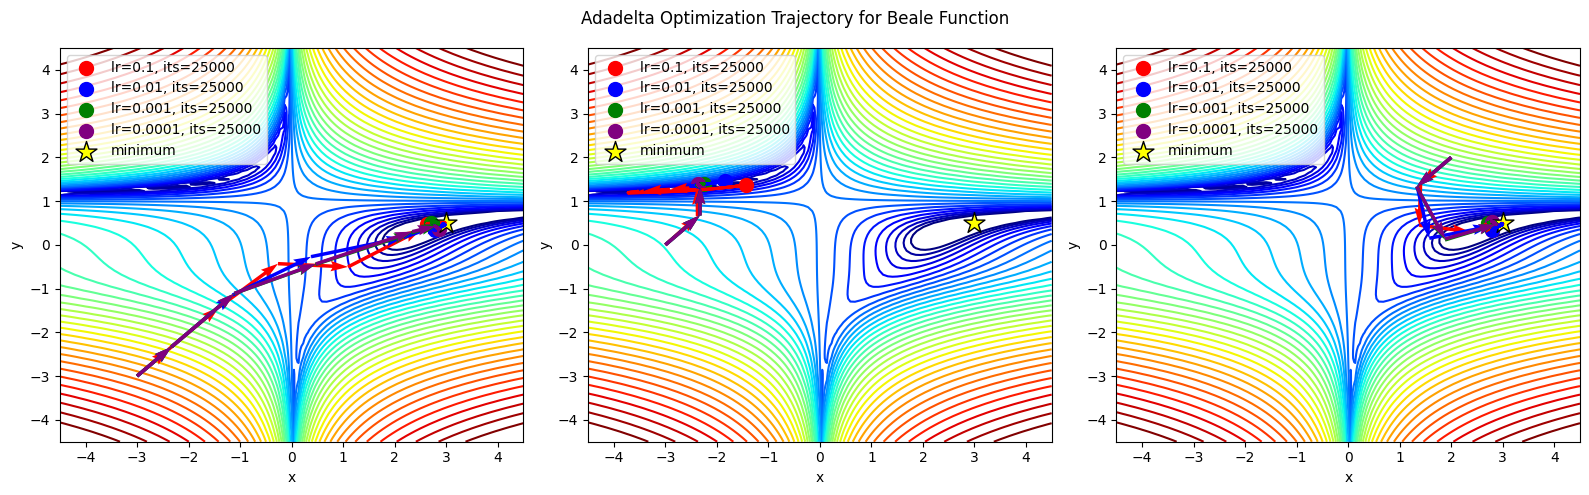

In [10]:
# Adadelta optimizer implementation
def adadelta_optimizer(func, grad_func, initial_params, rho=0.95, eps=1e-6, max_iter=25000, tol=1e-6):
    params = initial_params
    accumulated_gradient = np.zeros_like(params)
    accumulated_delta = np.zeros_like(params)
    t = 0
    
    # Store parameters every 100 steps
    params_history = [params.copy()]
    
    while t < max_iter:
        t += 1
        gradient = grad_func(*params)
        accumulated_gradient = rho * accumulated_gradient + (1 - rho) * gradient ** 2
        delta_params = -np.sqrt(accumulated_delta + eps) / np.sqrt(accumulated_gradient + eps) * gradient
        params += delta_params
        accumulated_delta = rho * accumulated_delta + (1 - rho) * delta_params ** 2
        
        if t % 100 == 0:
            params_history.append(params.copy())
        
        if np.linalg.norm(gradient) < tol:
            break
    
    print("Converged after", t, "iterations")
    return params, params_history, t


# Optimizer name
optimizer_name = 'Adadelta'

# Plot three panels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
initial_params_arrays = [np.array([-3.0, -3.0]),np.array([-3.0, 0.0]),np.array([2.0, 2.0])]
for it,ax in enumerate(axs):
    contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    colors = ['red','blue', 'green', 'purple']
    for c, learning_rate in enumerate([0.1, 0.01, 0.001, 0.0001]):
        print("Learning Rate:", learning_rate)
        
        # Initial parameters and hyperparameters
        initial_params = initial_params_arrays[it].copy()

        # Execute Optimizer
        optimized_params, params_history, its = adadelta_optimizer(beale, beale_gradient, initial_params, learning_rate)

        # Print optimized parameters
        print("Optimized Parameters:", optimized_params)
        ax.scatter(optimized_params[0], optimized_params[1], color=colors[c], s=100, zorder=2, label='lr='+str(learning_rate) + ', its='+str(its))

        # Draw vectors from the previous position to the current position
        for i in range(1, len(params_history)):
            ax.quiver(*params_history[i-1], *(params_history[i]-params_history[i-1]), angles='xy', scale_units='xy', scale=1, color=colors[c], zorder=3)

    # Draw a yellow star with a black border at [3.0, 0.5]
    ax.scatter(3.0, 0.5, marker='*', color='yellow', edgecolor='black', s=250, zorder=2, label='minimum')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.legend(loc='upper left')


fig.suptitle(f'{optimizer_name} Optimization Trajectory for Beale Function')
# Tight layout
plt.tight_layout()
# Save figure with 300 dpi
# plt.savefig(f'adadelta_optimization_trajectory.png', dpi=300)
plt.show()


Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.63200147 0.48350177]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [2.78541269 0.32995281]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [2.71635467 0.50829423]
Learning Rate: 0.0001
Converged after 25000 iterations
Optimized Parameters: [2.86034754 0.3535005 ]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [-1.4359542   1.36416485]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [-1.83545389  1.45252186]
Learning Rate: 0.001
Converged after 25000 iterations
Optimized Parameters: [-2.24821864  1.39738096]
Learning Rate: 0.0001
Converged after 25000 iterations
Optimized Parameters: [-2.35941061  1.38791655]
Learning Rate: 0.1
Converged after 25000 iterations
Optimized Parameters: [2.78400617 0.32920178]
Learning Rate: 0.01
Converged after 25000 iterations
Optimized Parameters: [2.78466067 0.32939358]

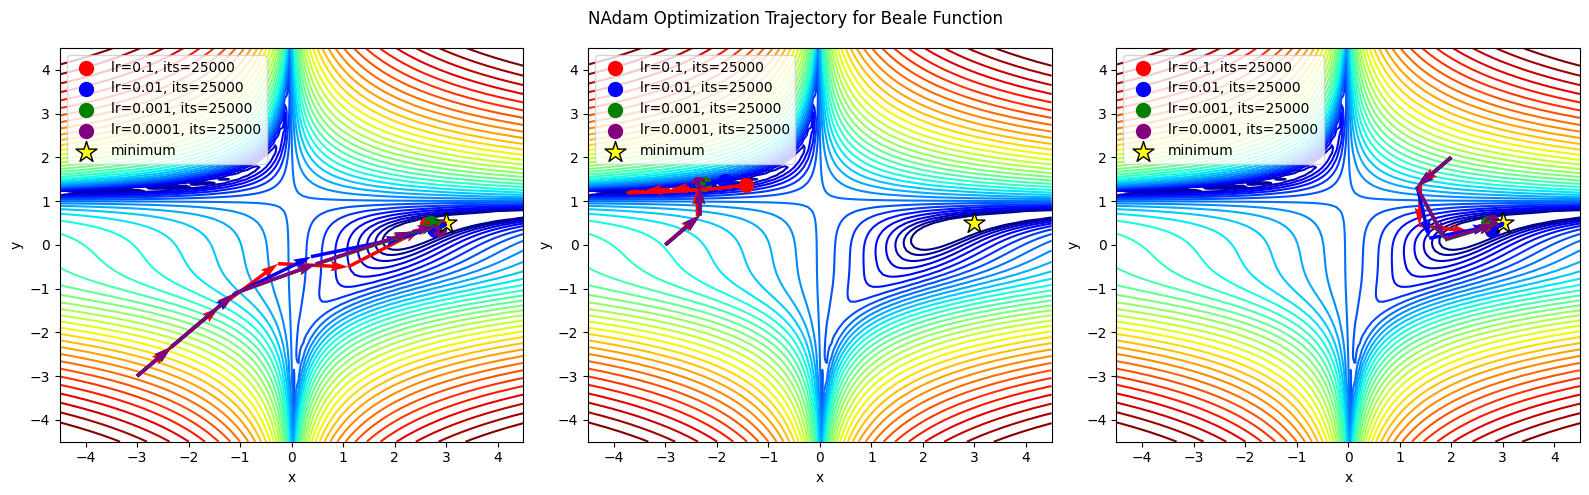

In [11]:
# NAdam optimizer implementation
def nadam_optimizer(func, grad_func, initial_params, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=25000, tol=1e-6):
    params = initial_params
    m = np.zeros_like(params)  # Exponential moving average of gradient
    v = np.zeros_like(params)  # Exponential moving average of squared gradient
    t = 0
    beta1_product = beta1
    beta2_product = beta2
    
    # Store parameters every 100 steps
    params_history = [params.copy()]
    
    while t < max_iter:
        t += 1
        gradient = grad_func(*params)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        
        # Bias correction
        m_hat = m / (1 - beta1_product)
        v_hat = v / (1 - beta2_product)
        
        # Update parameters
        params -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        
        # Update beta1 and beta2 products
        beta1_product *= beta1
        beta2_product *= beta2
        
        if t % 100 == 0:
            params_history.append(params.copy())
        
        if np.linalg.norm(gradient) < tol:
            break
    
    print("Converged after", t, "iterations")
    return params, params_history, t

# Optimizer name
optimizer_name = 'NAdam'

# Plot three panels
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
initial_params_arrays = [np.array([-3.0, -3.0]),np.array([-3.0, 0.0]),np.array([2.0, 2.0])]
for it,ax in enumerate(axs):
    contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    colors = ['red','blue', 'green', 'purple']
    for c, learning_rate in enumerate([0.1, 0.01, 0.001, 0.0001]):
        print("Learning Rate:", learning_rate)
        
        # Initial parameters and hyperparameters
        initial_params = initial_params_arrays[it].copy()

        # Execute Optimizer
        optimized_params, params_history, its = adadelta_optimizer(beale, beale_gradient, initial_params, learning_rate)

        # Print optimized parameters
        print("Optimized Parameters:", optimized_params)
        ax.scatter(optimized_params[0], optimized_params[1], color=colors[c], s=100, zorder=2, label='lr='+str(learning_rate) + ', its='+str(its))

        # Draw vectors from the previous position to the current position
        for i in range(1, len(params_history)):
            ax.quiver(*params_history[i-1], *(params_history[i]-params_history[i-1]), angles='xy', scale_units='xy', scale=1, color=colors[c], zorder=3)

    # Draw a yellow star with a black border at [3.0, 0.5]
    ax.scatter(3.0, 0.5, marker='*', color='yellow', edgecolor='black', s=250, zorder=2, label='minimum')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-4.5, 4.5)
    ax.set_ylim(-4.5, 4.5)
    ax.legend(loc='upper left')


fig.suptitle(f'{optimizer_name} Optimization Trajectory for Beale Function')
# Tight layout
plt.tight_layout()
# Save figure with 300 dpi
# plt.savefig(f'nadam_optimization_trajectory.png', dpi=300)
plt.show()
